In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/ts-course-data/tunnel.csv', parse_dates=['Day'])
data.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day          747 non-null    datetime64[ns]
 1   NumVehicles  747 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.8 KB


In [4]:
data.set_index('Day').to_period()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569
...,...
2005-11-12,104646
2005-11-13,94424
2005-11-14,112165


# Moving average function of Pandas

**min_periods is the least no. of elements in a window to calculate the average**

In [5]:
moving_average = data.rolling(window=365,
                              center=True,
                              min_periods=183).mean()
moving_average

,NumVehicles
0,99127.426230
1,99094.489130
2,99112.481081
3,99146.639785
4,99196.122995
...,...
742,112995.689840
743,113058.763441
744,113195.718919
745,113342.559783


<AxesSubplot:ylabel='NumVehicles'>

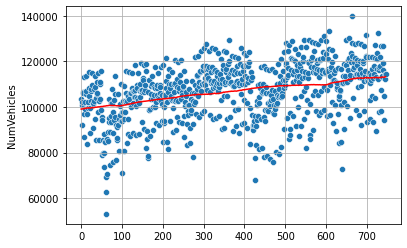

In [7]:
plt.grid()
sns.lineplot(data=data, x=np.arange(len(moving_average)),
             y=moving_average['NumVehicles'],
            color='r')
sns.scatterplot(data=data, x=np.arange(len(moving_average)), y=data['NumVehicles'])

**statsmodel time series module gives several methods to analyse and predict time dependent features. Deterministic Process is anything that isn't random but can be found using equations**

In [8]:
from statsmodels.tsa.deterministic import DeterministicProcess

In [9]:
X=pd.DataFrame()
X['Day'] = data['Day']

dp= DeterministicProcess(index= data.index,
                        constant=True,
                        order=1,
                         #polynomial order 
                         #eg. order=2: quadratic, order=3: cubic
                        drop=True)
X1 = dp.in_sample()
X1.head()

,const,trend
0,1.0,1.0
1,1.0,2.0
2,1.0,3.0
3,1.0,4.0
4,1.0,5.0


In [10]:
X3 = pd.concat([X,X1], axis=1)
X3 = X3.set_index('Day')
X3.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


# Using coeff. Obtained from statsmodel Deterministic Process in Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

y = data["NumVehicles"]  # the target

model = LinearRegression(fit_intercept=False) 
#as X3 already has constant feature, we fit_intercept is taken False
#Linear Regression behaves poorly in duplicate features (collinearity)
model.fit(X3, y)

y_pred = pd.Series(model.predict(X3), index=X3.index)

<AxesSubplot:ylabel='NumVehicles'>

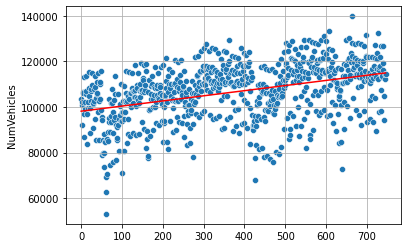

In [13]:
plt.grid()
sns.lineplot(x=np.arange(len(moving_average)),
             y=y_pred,
            color='r')
sns.scatterplot(data=data, x=np.arange(len(moving_average)), y=data['NumVehicles'])

# Forecasting 30 days after 

In [19]:
X = dp.out_of_sample(steps=30)
y_30dayforecast = pd.Series(model.predict(X), index=X.index)
y_30dayforecast.head()

747    114981.801146
748    115004.298595
749    115026.796045
750    115049.293494
751    115071.790944
dtype: float64

***Plotting 30 day forecast with last 120 days' data***

<AxesSubplot:ylabel='NumVehicles'>

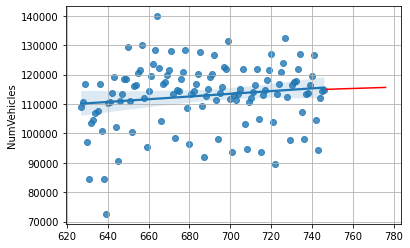

In [45]:
data_length = 747

plt.grid()
sns.lineplot(x=np.arange(data_length,data_length+len(y_30dayforecast)), y=y_30dayforecast, color='r')
sns.regplot(x=np.arange(data_length-120,len(moving_average)), y=data['NumVehicles'].iloc[-120:])